In [1]:
import numpy as np
import pandas as pd
from scipy.sparse.linalg import eigs 
import scipy.linalg as lin

df_edges = pd.read_csv('./got_edges.csv') 
df_nodes = pd.read_csv('./got_nodes.csv') 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)


In [34]:
df_edges

,Source,Target,Weight
0,Aemon,Grenn,5
1,Aemon,Samwell,31
2,Aerys,Jaime,18
3,Aerys,Robert,6
4,Aerys,Tyrion,5
...,...,...,...
347,Walder,Petyr,6
348,Walder,Roslin,6
349,Walton,Jaime,10
350,Ygritte,Qhorin,7


In [4]:
A = np.array([[0,1,1,1,0,0],
    [1,0,1,0,1,0],
    [1,1,0,0,0,1],
    [1,0,0,0,1,1],
    [0,1,0,1,0,1],
    [0,0,1,1,1,0]])

array([[0, 1, 1, 1, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [1, 1, 0, 0, 0, 1],
       [1, 0, 0, 0, 1, 1],
       [0, 1, 0, 1, 0, 1],
       [0, 0, 1, 1, 1, 0]])

In [35]:
df_nodes

,Id,Label
0,Aemon,Aemon
1,Grenn,Grenn
2,Samwell,Samwell
3,Aerys,Aerys
4,Jaime,Jaime
...,...,...
102,Ramsay,Ramsay
103,Chataya,Chataya
104,Shireen,Shireen
105,Doran,Doran


In [47]:
# Load graph from csv file A is adjacency matrix and D is degree matrix
m = df_nodes.shape[0]
n = df_edges.shape[0]

A = np.zeros((m,m))
D = np.zeros((m,m))

for i in range(n):
    U = df_edges.values[i,0]
    V = df_edges.values[i,1]
    w = df_edges.values[i,2]
    id_U = np.where((df_nodes.values[:,0] == U))
    id_V = np.where((df_nodes.values[:,0] == V))
    a = id_U[0]
    b = id_V[0]
    A[a,b] = w
    A[b,a] = w
    
for i in range(m):
    D[i,i] = np.sum(A[:,i])
    

# Compute Unnormalized Laplacian 'L'
L = D - A
I = np.identity(m);


# Compute Normalized Laplacian 'Lt' 
Dh = lin.sqrtm(D)

Dh = lin.inv(Dh)

#Lt = I - Dh.dot(A.dot(Dh))
Lt = Dh@L@Dh
# Compute Normalized Laplacian 'LI' 
#Dh = lin.sqrtm(D)

DI = lin.inv(D)

LI = DI@L@DI





In [14]:

# Now lets perform spectral embedding on graph in A

D = np.diag(sum(A,0))
#L = D - A
#Dh = lin.sqrtm(D)
#Dh = lin.inv(Dh)
#Lt = Dh@L@Dh


# Y has the one dimensional projection of graph in A
# Compute Unnormalized Laplacian 'L'
L = D - A
#I = np.identity(m);


# Compute Normalized Laplacian 'Lt' 
Dh = lin.sqrtm(D)

Dh = lin.inv(Dh)

#Lt = I - Dh.dot(A.dot(Dh))
Lt = Dh@L@Dh
# Compute Normalized Laplacian 'LI' 
#Dh = lin.sqrtm(D)

DI = lin.inv(D)

LI = DI@L@DI



In [19]:
L

array([[ 3, -1, -1, -1,  0,  0],
       [-1,  3, -1,  0, -1,  0],
       [-1, -1,  3,  0,  0, -1],
       [-1,  0,  0,  3, -1, -1],
       [ 0, -1,  0, -1,  3, -1],
       [ 0,  0, -1, -1, -1,  3]])

In [20]:
Lt

array([[ 1.        , -0.33333333, -0.33333333, -0.33333333,  0.        ,
         0.        ],
       [-0.33333333,  1.        , -0.33333333,  0.        , -0.33333333,
         0.        ],
       [-0.33333333, -0.33333333,  1.        ,  0.        ,  0.        ,
        -0.33333333],
       [-0.33333333,  0.        ,  0.        ,  1.        , -0.33333333,
        -0.33333333],
       [ 0.        , -0.33333333,  0.        , -0.33333333,  1.        ,
        -0.33333333],
       [ 0.        ,  0.        , -0.33333333, -0.33333333, -0.33333333,
         1.        ]])

In [21]:
LI

array([[ 0.33333333, -0.11111111, -0.11111111, -0.11111111,  0.        ,
         0.        ],
       [-0.11111111,  0.33333333, -0.11111111,  0.        , -0.11111111,
         0.        ],
       [-0.11111111, -0.11111111,  0.33333333,  0.        ,  0.        ,
        -0.11111111],
       [-0.11111111,  0.        ,  0.        ,  0.33333333, -0.11111111,
        -0.11111111],
       [ 0.        , -0.11111111,  0.        , -0.11111111,  0.33333333,
        -0.11111111],
       [ 0.        ,  0.        , -0.11111111, -0.11111111, -0.11111111,
         0.33333333]])

In [11]:



scatter = go.Scatter(
    x = Y[:,0],
    y = Y[:,1],
    mode='markers+text',
    text= df_nodes.values[:,0],
    textposition='bottom center',
    marker=dict(
        size=5,
        symbol='circle',
        opacity=0.5
    )
)






data = [scatter]
iplot(data, filename='fig0')

NameError: name 'Y' is not defined

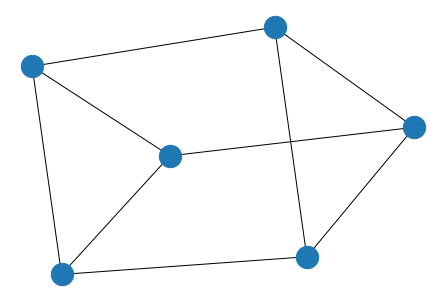

In [27]:
import matplotlib.pyplot as plt
import networkx as nx

def show_graph_with_labels(adjacency_matrix):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=500)
    plt.show()

show_graph_with_labels(A)

In [34]:
E, V = eigh(L)
E = np.real(E)
V = np.real(V)

Y = V[:,1:4]*100

In [36]:
E, V = eigh(Lt)
E = np.real(E)
V = np.real(V)

Y = V[:,1:4]*100

In [38]:
E, V = eigh(LI)
E = np.real(E)
V = np.real(V)

Y = V[:,1:4]*100

In [35]:

scatter = go.Scatter(
    x = Y[:,0],
    y = Y[:,1],
    mode='markers+text',
    text= df_nodes.values[:,0],
    textposition='bottom center',
    marker=dict(
        size=5,
        symbol='circle',
        opacity=0.5
    )
)






data = [scatter]
iplot(data, filename='fig0')

In [37]:

scatter = go.Scatter(
    x = Y[:,0],
    y = Y[:,1],
    mode='markers+text',
    text= df_nodes.values[:,0],
    textposition='bottom center',
    marker=dict(
        size=5,
        symbol='circle',
        opacity=0.5
    )
)






data = [scatter]
iplot(data, filename='fig0')

In [48]:
E, V = eigs(LI,4,which='SR')
E = np.real(E)
V = np.real(V)

Y = V[:,1:4]*100

In [39]:

scatter = go.Scatter(
    x = Y[:,0],
    y = Y[:,1],
    mode='markers+text',
    text= df_nodes.values[:,0],
    textposition='bottom center',
    marker=dict(
        size=5,
        symbol='circle',
        opacity=0.5
    )
)






data = [scatter]
iplot(data, filename='fig0')